# PROYECTO PREDICCIÓN ENFERMEDAD DEL CORAZÓN

## **1) Información del Dataset**

### Link del dataset: https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset
El conjunto proviene del estudio epidemiológico de largo plazo realizado en Framingham, Massachusetts, iniciado en 1948 con 5.209 participantes (adultos entre 30 y 62 años)

El dataset agrupa factores demográficos, de comportamiento y médicos, y se usa para predecir un fenómeno binario: si el paciente desarrollará enfermedad coronaria en un plazo de 10 años (variable TenYearCHD).

## Importar Librerías

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, log_loss, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from IPython.display import display, Markdown


## Cargar CSV

In [3]:
patients = pd.read_csv(r"C:\Users\nico_\Proyectos Jupyter\framingham.csv")

patients.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df = patients
print(df.dtypes)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [7]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## ***2) Análisis exploratorio: Correlaciones y HeatMap***

In [9]:
print("La correlación entre cada variable y TenYearCHD es: ")
print(df.corr()["TenYearCHD"].sort_values(ascending=False))

La correlación entre cada variable y TenYearCHD es: 
TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.125544
diabetes           0.097317
male               0.088428
BPMeds             0.087489
totChol            0.082184
BMI                0.075192
prevalentStroke    0.061810
cigsPerDay         0.057884
heartRate          0.022913
currentSmoker      0.019456
education         -0.054059
Name: TenYearCHD, dtype: float64


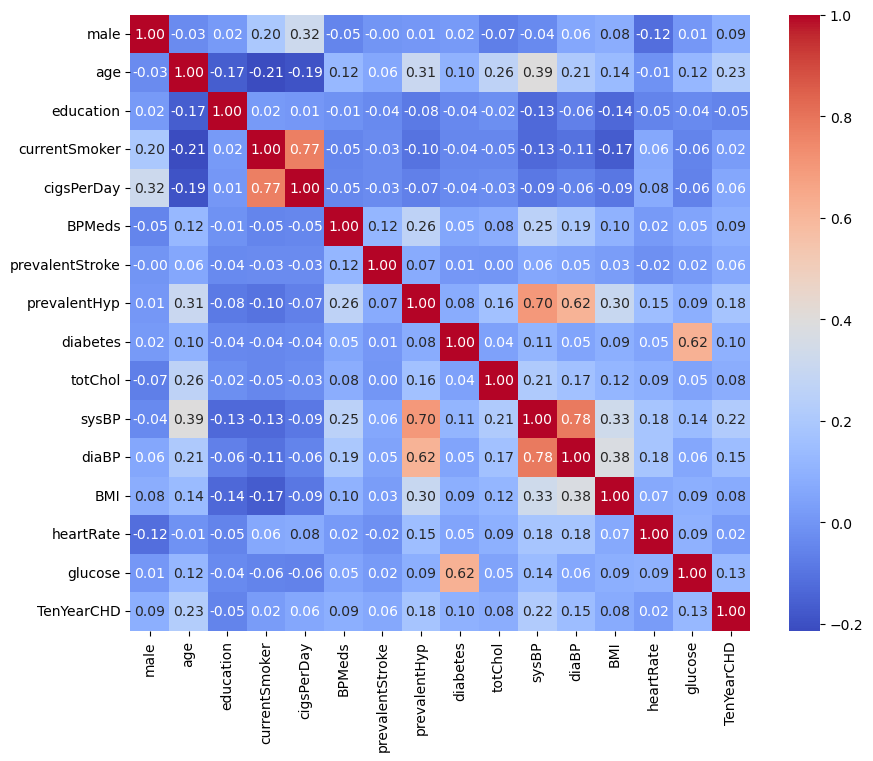

In [11]:

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


## 2.2.1) Box plots para ver distribución


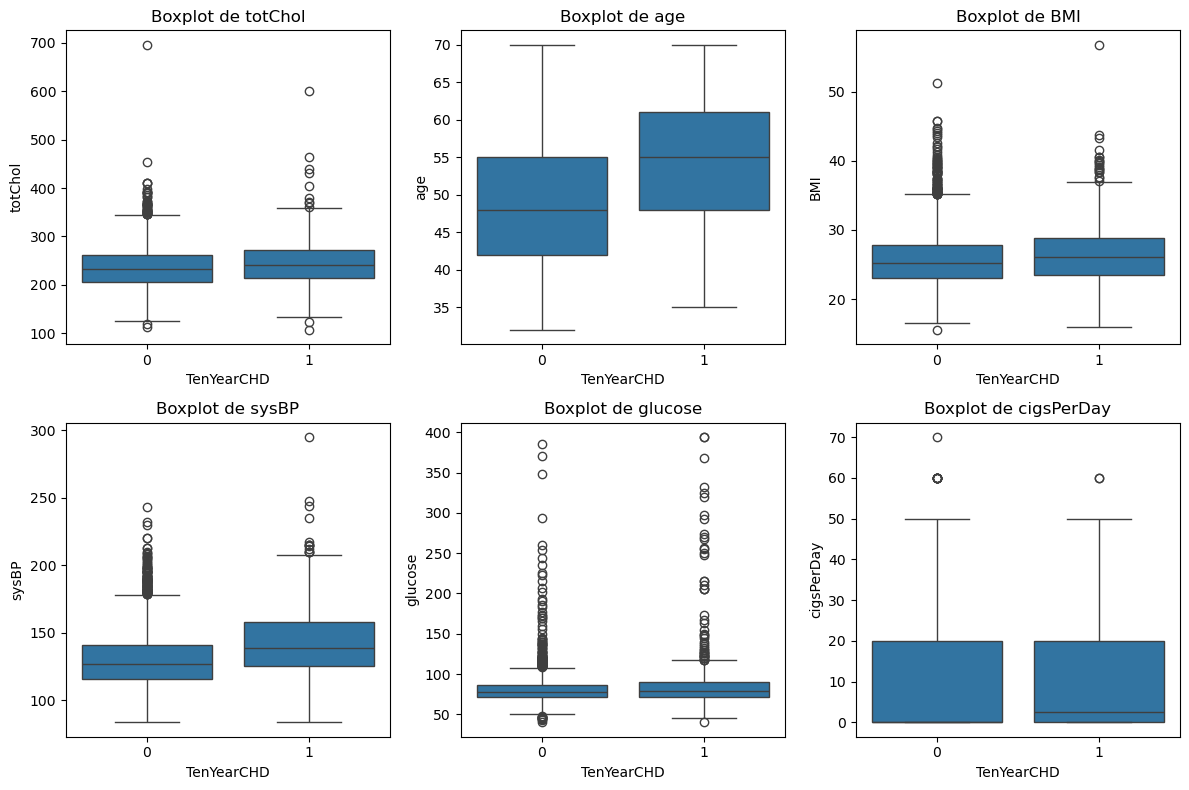

In [13]:

# Variables a graficar
variables = ["totChol", "age", "BMI", "sysBP", "glucose", "cigsPerDay"]  
num_vars = len(variables)

# Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))  
axes = axes.flatten()  # Asegurar que los ejes estén en una lista plana

# Graficar cada variable
for i, var in enumerate(variables):
    sns.boxplot(x=df["TenYearCHD"], y=df[var], ax=axes[i])
    axes[i].set_title(f"Boxplot de {var}")

plt.tight_layout()
plt.show()


## 2.2.2) Distribución de Variables Categóricas por Clase Objetivo

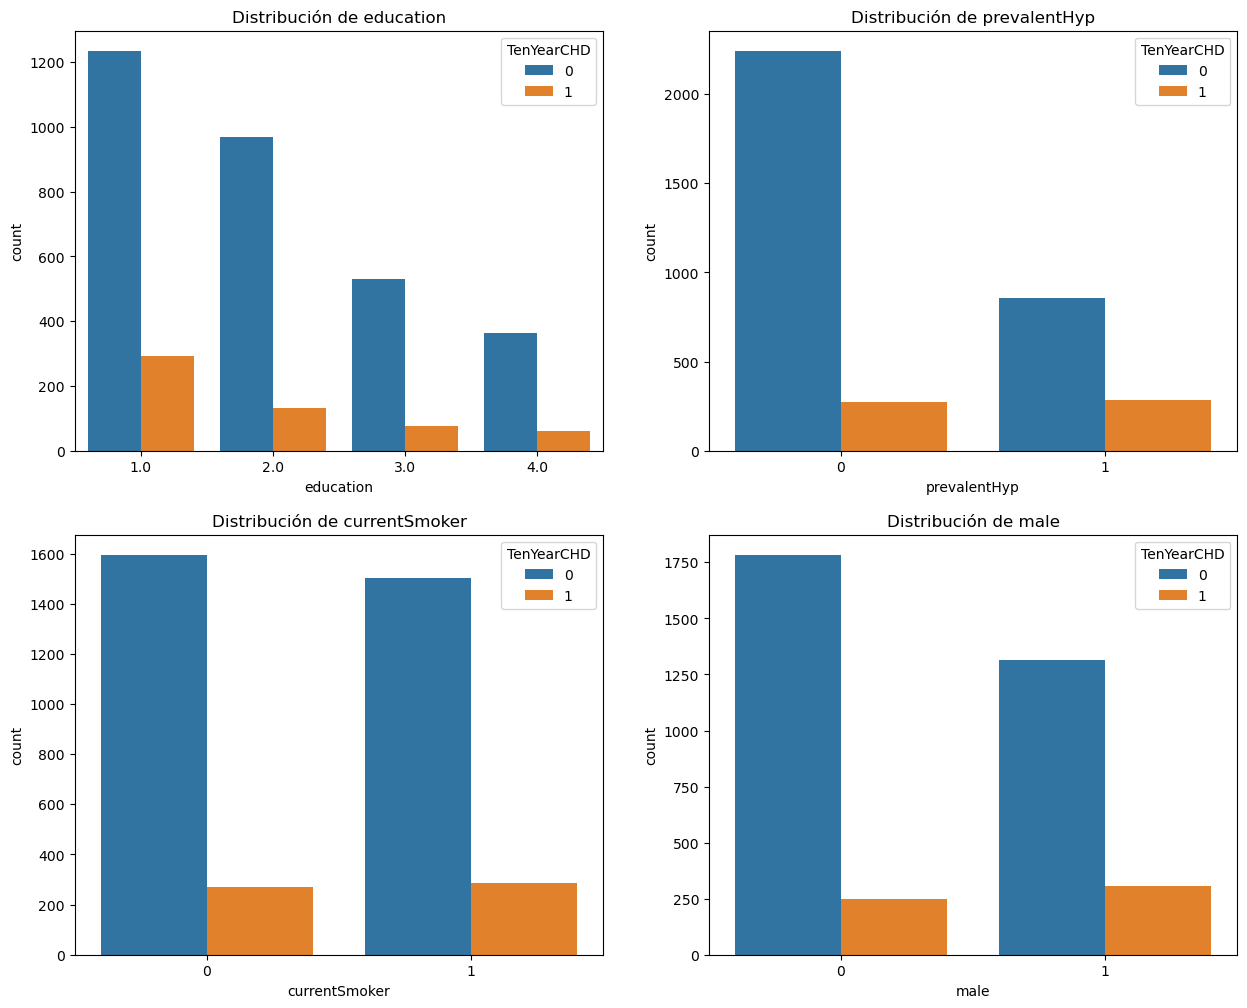

In [55]:

figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))
axes = axes.flatten()

variables2 = ["education","prevalentHyp", "currentSmoker","male"]

for i, var in enumerate(variables2):
    sns.countplot(x=var, hue="TenYearCHD", data=df, ax=axes[i])
    axes[i].set_title(f"Distribución de {var}")

plt.show()

**Se puede observar por los gráficos de distribución que el conteo de predicciones positivas no fue significativamente diferente respecto a las prediccione negativas.**

## 2.2.3) Histogramas con Curva de Densidad (KDE)

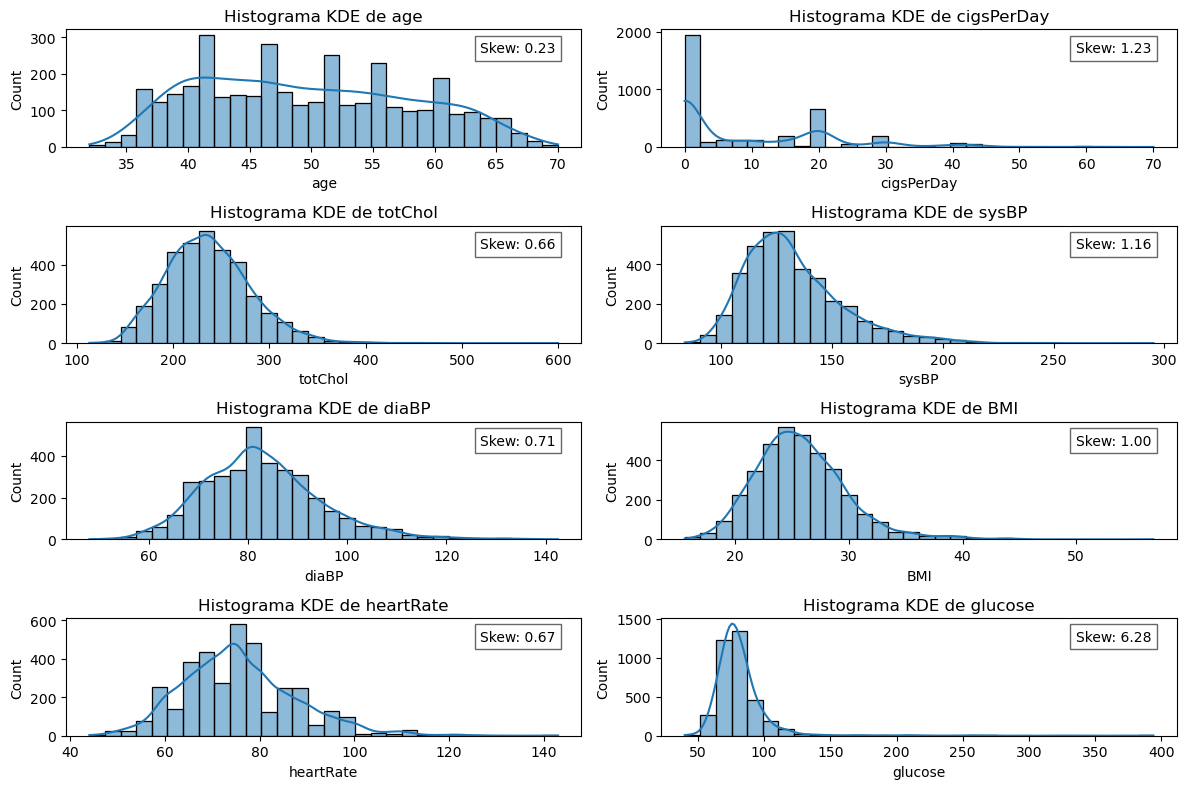

In [61]:

# Variables a graficar
variables = ["age","cigsPerDay","totChol", "sysBP","diaBP","BMI","heartRate", "glucose"]
num_vars = len(variables)

# Crear subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))  
axes = axes.flatten() 

# Graficar variables
for i, var in enumerate(variables):
    sns.histplot(df[var], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Histograma KDE de {var}")
    skewness = df[var].skew()
    axes[i].text(
        0.95, 0.90, f"Skew: {skewness:.2f}",
        transform=axes[i].transAxes, fontsize=10,
        verticalalignment="top", horizontalalignment="right",
        bbox=dict(facecolor="white", alpha=0.6)
    )

plt.tight_layout()
plt.show()


## 2.3) Evaluar valores faltantes

In [21]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print("Columna: ")
    print(missing_data[column].value_counts())
    print("")

Columna: 
male
False    4238
Name: count, dtype: int64

Columna: 
age
False    4238
Name: count, dtype: int64

Columna: 
education
False    4133
True      105
Name: count, dtype: int64

Columna: 
currentSmoker
False    4238
Name: count, dtype: int64

Columna: 
cigsPerDay
False    4209
True       29
Name: count, dtype: int64

Columna: 
BPMeds
False    4185
True       53
Name: count, dtype: int64

Columna: 
prevalentStroke
False    4238
Name: count, dtype: int64

Columna: 
prevalentHyp
False    4238
Name: count, dtype: int64

Columna: 
diabetes
False    4238
Name: count, dtype: int64

Columna: 
totChol
False    4188
True       50
Name: count, dtype: int64

Columna: 
sysBP
False    4238
Name: count, dtype: int64

Columna: 
diaBP
False    4238
Name: count, dtype: int64

Columna: 
BMI
False    4219
True       19
Name: count, dtype: int64

Columna: 
heartRate
False    4237
True        1
Name: count, dtype: int64

Columna: 
glucose
False    3850
True      388
Name: count, dtype: int64

Column

## ***3) Implementación de Modelos de Predicción***

## 3.1) Usando librería LogisticRegression de SKLEARN

In [19]:
#Opción 1: con mejor resultado
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df = pd.read_csv(r"C:\Users\nico_\Proyectos Jupyter\framingham.csv")

df = df.dropna()

df["cigs_category"] = pd.cut(df["cigsPerDay"], bins=[0, 10, 20, np.inf], labels=["Bajo", "Medio", "Alto"])
df = pd.get_dummies(df, columns=["cigs_category"], drop_first=False)  

In [21]:


# 1) Separar características y variable objetivo
X = df.drop(columns=["TenYearCHD", "education", "cigsPerDay"])
Y = df["TenYearCHD"]


In [23]:
# 2️) Aplicar Oversampling para balancear las clases
sampler = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = sampler.fit_resample(X, Y)

In [25]:
# Normalizar los datos
X = preprocessing.StandardScaler().fit(X).transform(X)

# Dividir en train y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
# 3) Dividir en entrenamiento (90%) y prueba (10%)
X_train_valid, X_test, Y_train_valid, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.1, random_state=42, stratify=Y_resampled)

In [29]:
# 4) Dividir entrenamiento en entrenamiento (90%) y validación (10%)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_valid, Y_train_valid, test_size=0.1, random_state=42, stratify=Y_train_valid)

In [31]:
# 5) Normalización de datos (importante para KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [33]:


# Definir hiperparámetros a probar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg', 'sag']  # Solvers compatibles sin especificar penalty
    }

# Definir el modelo base
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Aplicar GridSearchCV con validación cruzada
grid_search = GridSearchCV(log_reg, param_grid, scoring='f1', cv=5, n_jobs=-1, refit="f1")
grid_search.fit(X_train, Y_train)
results = []
for i in range(len(grid_search.cv_results_['params'])):
    params = grid_search.cv_results_['params'][i]
    model = LogisticRegression(**params, max_iter=1000, random_state=42)
    model.fit(X_train, Y_train)
    Y_valid_pred = model.predict(X_valid)

    precision = precision_score(Y_valid, Y_valid_pred)
    recall = recall_score(Y_valid, Y_valid_pred)
    f1_macro = f1_score(Y_valid, Y_valid_pred, average='macro')  # Alternativa

    score = (precision + recall) / 2  # Promedio de precision y recall
    results.append((params, score))

# Encontrar la mejor configuración basada en X_valid
best_params_valid = max(results, key=lambda x: x[1])[0]
print(f"Mejores hiperparámetros en validación: {best_params_valid}")


Mejores hiperparámetros en validación: {'C': 1, 'solver': 'lbfgs'}


In [35]:
#LINEAR REGRESSION MODEL
LR = LogisticRegression(C=1, solver='lbfgs').fit(X_train,Y_train)
#LR = LogisticRegression(C=1, solver='newton-cg').fit(X_train,Y_train)

In [37]:

# Predecir etiquetas binarias y probabilidades
Y_pred_prob = LR.predict_proba(X_test)[:, 1]  # Prob. de la clase 1
Y_pred = (Y_pred_prob > 0.5).astype(int)  # Convertir prob. en etiquetas binarias

Y_pred = Y_pred
print("Y_pred shape:", Y_pred.shape)


Y_pred shape: (620,)


In [39]:

print("Y_test_flat shape:", Y_test.shape)

# Cálculo de precisión con np.sum
acc_manual = (1 - np.sum(np.abs(Y_pred - Y_test)) / Y_test.shape[0]) * 100
print(f"Accuracy (manual): {acc_manual:.2f}%")


# Cálculo de precisión con accuracy_score
acc_sklearn = accuracy_score(Y_test, Y_pred) * 100
print(f"Accuracy (sklearn): {acc_sklearn:.2f}%")

# Calcular log loss
logloss = log_loss(Y_test, Y_pred_prob)
print(f"Log Loss: {logloss:.4f}")

#Calcular F1-score
f1 = f1_score(Y_test, Y_pred)
print(f"F1-score: {f1:.4f}")

Y_test_flat shape: (620,)
Accuracy (manual): 71.13%
Accuracy (sklearn): 71.13%
Log Loss: 0.5761
F1-score: 0.7080


In [41]:
from sklearn.metrics import classification_report
from IPython.display import display, Markdown

# Generar el reporte como diccionario
report_dict = classification_report(Y_test, Y_pred, output_dict=True)

# Convertirlo en un DataFrame
df_report = pd.DataFrame(report_dict).transpose()

# Mostrar título de la tabla
display(Markdown("## 🔹 Classification Report 🔹"))


#display(df_report.style.background_gradient(cmap="Blues").format("{:.2f}"))



## 🔹 Classification Report 🔹

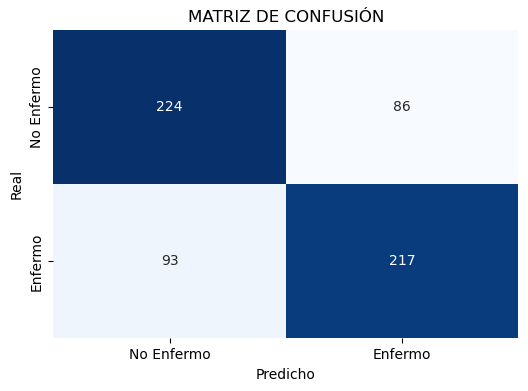

In [43]:
# Crear el gráfico con seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["No Enfermo", "Enfermo"], yticklabels=["No Enfermo", "Enfermo"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("MATRIZ DE CONFUSIÓN")
plt.show()

--------------------------------------------------

## 3.2) MÉTODO POR KNN

In [23]:
import pandas as pd
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\nico_\Proyectos Jupyter\framingham.csv")

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### 3.2.1.1) Procesamiento de Valores faltantes: Opción 1: CORRECTA

In [25]:
#Opción 1: con mejor resultado
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = df.dropna()

df["cigs_category"] = pd.cut(df["cigsPerDay"], bins=[0, 10, 20, np.inf], labels=["Bajo", "Medio", "Alto"])
df = pd.get_dummies(df, columns=["cigs_category"], drop_first=False)  


### 3.2.1.2) Procesamiento de Valores faltantes: Opción 2: NO MEJORA RESULTADO. NO EJECUTAR CELDA

In [49]:
#SUSTITICIÓN DE VALORES FALTANTES

# Reemplazo con la media para variables continuas
df["cigsPerDay"] = df["cigsPerDay"].fillna(df["cigsPerDay"].mean())
df["cigs_category"] = pd.cut(df["cigsPerDay"], bins=[0, 10, 20, np.inf], labels=["Bajo", "Medio", "Alto"])
df = pd.get_dummies(df, columns=["cigs_category"], drop_first=False) 

df["glucose"] = df["glucose"].fillna(df["glucose"].mode()[0])

# Clasificación de sysBP en 3 categorías
df["sysBP_category"] = pd.cut(df["sysBP"], 
                              bins=[0, 90, 140, float("inf")], 
                              labels=["Baja", "Media", "Alta"], 
                              right=False)

# Clasificación de diaBP en 3 categorías
df["diaBP_category"] = pd.cut(df["diaBP"], 
                              bins=[0, 60, 90, float("inf")], 
                              labels=["Baja", "Media", "Alta"], 
                              right=False)

# Convertir categorías en variables dummy
df = pd.get_dummies(df, columns=["sysBP_category", "diaBP_category"], drop_first=False)
df.drop(columns=["sysBP","diaBP"])

binary_cols = ['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'currentSmoker', 'male']
df[binary_cols] = df[binary_cols].astype("int64")
df.dtypes

# Mostrar primeras filas
df.head(2)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,cigs_category_Alto,cigs_category_Bajo,cigs_category_Medio,cigs_category_Alto,sysBP_category_Baja,sysBP_category_Media,sysBP_category_Alta,diaBP_category_Baja,diaBP_category_Media,diaBP_category_Alta
0,1,39,4.0,0,0.0,0,0,0,0,195.0,...,False,False,False,False,False,True,False,False,True,False
1,0,46,2.0,0,0.0,0,0,0,0,250.0,...,False,False,False,False,False,True,False,False,True,False


## 3.2.2.1) Implementación del modelo KNN

In [27]:
# 1) Separar características y variable objetivo
X = df.drop(columns=["TenYearCHD", "education", "cigsPerDay"])
y = df["TenYearCHD"]

In [29]:
# 2️) Aplicar Oversampling para balancear las clases
sampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X, y)

In [31]:
# 3) Dividir en entrenamiento (90%) y prueba (10%)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42, stratify=y_resampled)

In [33]:
# 4) Dividir entrenamiento en entrenamiento (90%) y validación (10%)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.1, random_state=42, stratify=y_train_valid)


In [35]:
# 5) Normalización de datos (importante para KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## 3.2.2.2) Selección de n_neighbors óptimo

In [37]:
best_score=0

# Buscar el mejor K con validación cruzada en X_train
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="roc_auc")
    avg_score = scores.mean()
    if avg_score > best_score:
        best_score = avg_score
        best_k = k

# Entrenar con el mejor K y evaluar en validación
best_knn = KNeighborsClassifier(n_neighbors=best_k).fit(X_train, y_train)
y_valid_pred_prob = best_knn.predict_proba(X_valid)[:, 1]
valid_auc_roc = roc_auc_score(y_valid, y_valid_pred_prob)

# Si el modelo va bien en validación, probar en test
y_test_pred_prob = best_knn.predict_proba(X_test)[:, 1]
test_auc_roc = roc_auc_score(y_test, y_test_pred_prob)

print(f"\n🔹 Mejor valor de K encontrado: {best_k} con AUC-ROC en validación cruzada: {best_score:.4f}")
print(f"📌 AUC-ROC en Validación: {valid_auc_roc:.4f}")
print(f"📌 AUC-ROC en Test: {test_auc_roc:.4f}")




🔹 Mejor valor de K encontrado: 1 con AUC-ROC en validación cruzada: 0.9106
📌 AUC-ROC en Validación: 0.9247
📌 AUC-ROC en Test: 0.9565


## 3.2.3) Entrenamiento del modelo y Predicción

In [41]:

#7 Entrenamiento del modelo con el mejor K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

#8 Predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]



## 3.2.4.1) Evaluación del modelo: <code> Reporte de Clasificación </code>

In [43]:

# Generar el reporte como diccionario
report_dict = classification_report(y_test, y_pred, output_dict=True)
# Convertirlo en un Df
df_report = pd.DataFrame(report_dict).transpose()


# Mostrar tabla
display(Markdown("## 🔹 Classification Report 🔹"))
styled_df = df_report.style \
    .background_gradient(cmap="Blues") \
    .format("{:.2f}") \
    .set_table_attributes('style="font-size:16px; width:75%"')

display(styled_df)



## 🔹 Classification Report 🔹

,precision,recall,f1-score,support
0,1.00,0.91,0.95,310.00
1,0.92,1.00,0.96,310.00
accuracy,0.96,0.96,0.96,0.96
macro avg,0.96,0.96,0.96,620.00
weighted avg,0.96,0.96,0.96,620.00


## 3.2.4.2) Evaluación del modelo: <code> Matriz de Confusión </code>

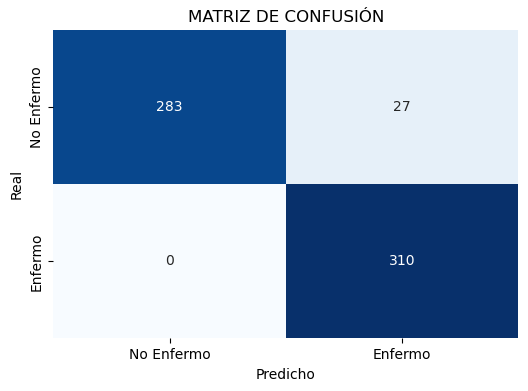

In [45]:
# Crear el gráfico

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["No Enfermo", "Enfermo"], yticklabels=["No Enfermo", "Enfermo"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("MATRIZ DE CONFUSIÓN")
plt.show()

### 3.2.5) Test de desempeño con una muestra aleatoria del dataset original

In [47]:

#1 Separar características y variable objetivo
X = df.drop(columns=["TenYearCHD", "education"])
y = df["TenYearCHD"]

#2 Aplicar Oversampling para balancear las clases
sampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X, y)

#3 Dividir en entrenamiento (90%) y prueba (10%)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42, stratify=y_resampled)

#4 Dividir Entrenamiento en entrenamiento (90%) y validación (10%)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.1, random_state=42, stratify=y_train_valid)

# Normalización de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Entrenamiento del modelo con el mejor K
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Preparar y normalizar el dataset de prueba
dfprueba = df.iloc[50:4420].dropna()
dfprueba2 = dfprueba.drop(columns=["TenYearCHD", "education"])
dfprueba2 = scaler.transform(dfprueba2)

# Predicciones en el dataset de prueba
y_pred = knn.predict(dfprueba2)
y_prob = knn.predict_proba(dfprueba2)[:, 1]

print(y_pred[0:5])
print(" ")
print(y_prob[0:5])

# Evaluación usando df de prueba 
if "TenYearCHD" in dfprueba.columns:
    y_test_real = dfprueba["TenYearCHD"]
    print("\n🔹 Reporte de clasificación:")
    print(classification_report(y_test_real, y_pred))
    
    if len(set(y_test_real)) > 1:
        print(f"\n🔹 AUC-ROC: {roc_auc_score(y_test_real, y_prob):.4f}")
    else:
        print("\n⚠️ Advertencia: No se puede calcular ROC-AUC porque y_test_real tiene solo una clase.")
    
    print("\n🔹 Matriz de Confusión:")
    print(confusion_matrix(y_test_real, y_pred))

[0 1 0 0 0]
 
[0. 1. 0. 0. 0.]

🔹 Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3059
           1       0.89      1.00      0.94       547

    accuracy                           0.98      3606
   macro avg       0.95      0.99      0.97      3606
weighted avg       0.98      0.98      0.98      3606


🔹 AUC-ROC: 0.9875

🔹 Matriz de Confusión:
[[2994   65]
 [   2  545]]
